In [1174]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [1175]:
data=pd.read_csv('Data sample for the project.csv')
data['const']=1
data.head()

,Date,BTC/USD (Exchange rate),ETH/USD (Exchange rate),BTC/USD:USD (Linear),ETH/USD:USD (Linear),BTC/USD:BTC (Inverse),ETH/USD:ETH (Inverse),const
0,2022/04/17 00:00:00,39678.12,2988.06,39649.1,2986.03,39665.7,2986.23,1
1,2022/04/18 00:00:00,40801.13,3055.56,40785.6,3054.02,40789.2,3054.88,1
2,2022/04/19 00:00:00,41493.18,3101.77,41472.9,3100.42,41482.2,3100.92,1
3,2022/04/20 00:00:00,41358.19,3076.04,41327.7,3074.01,41354.5,3075.12,1
4,2022/04/21 00:00:00,40480.01,2983.58,40449.8,2981.31,40460.2,2982.37,1


In [1176]:
model_BTC_lin=sm.OLS(data['BTC/USD (Exchange rate)'],data[['const','BTC/USD:USD (Linear)']]).fit()
model_BTC_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     BTC/USD (Exchange rate)   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 4.202e+08
Date:                     Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                             18:54:14   Log-Likelihood:                -1124.9
No. Observations:                      365   AIC:                             2254.
Df Residuals:                          363   BIC:                             2262.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2661      1.157      0.230      0.818      -2.010       2.542
BTC/USD:USD (Linear)     1.0004   4.88e-05   2.05e+04      0.000       1.000       1.000
==============================================================================
Omnibus:                       85.515   Durbin-Watson:                   1.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.862
Skew:                          -1.029   Prob(JB):                     1.69e-61
Kurtosis:                       6.764   Cond. No.                     9.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1177]:
A=np.array([[1,0],[0,1]])
t=np.array([0,1])
model_BTC_lin.f_test((A,t))

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=630.4669838149154, p=8.03330057225073e-119, df_denom=363, df_num=2>

In [1178]:
u_statistic_BTC_lin,p_value_BTC_lin = stats.ttest_rel(data['BTC/USD (Exchange rate)'], data['BTC/USD:USD (Linear)'], alternative='two-sided')
print(p_value_BTC_lin)

8.165990311687447e-107


In [1179]:
model_BTC_inv=sm.OLS(data['BTC/USD (Exchange rate)'],data[['const','BTC/USD:BTC (Inverse)']]).fit()
model_BTC_inv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     BTC/USD (Exchange rate)   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 1.790e+07
Date:                     Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                             18:54:14   Log-Likelihood:                -1700.8
No. Observations:                      365   AIC:                             3406.
Df Residuals:                          363   BIC:                             3413.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.5246      5.606      0.985      0.325      -5.500      16.549
BTC/USD:BTC (Inverse)     1.0002      0.000   4231.149      0.000       1.000       1.001
==============================================================================
Omnibus:                      173.186   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2499.774
Skew:                          -1.600   Prob(JB):                         0.00
Kurtosis:                      15.415   Cond. No.                     9.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1180]:
model_BTC_inv.f_test((A,t))

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=23.455932221661065, p=2.628625705276084e-10, df_denom=363, df_num=2>

In [1181]:
u_statistic_BTC_inv,p_value_BTC_inv = stats.ttest_rel(data['BTC/USD (Exchange rate)'], data['BTC/USD:BTC (Inverse)'], alternative='two-sided')
print(p_value_BTC_inv)

3.754069842838814e-11


Total profit: 281.98909999997744 USD


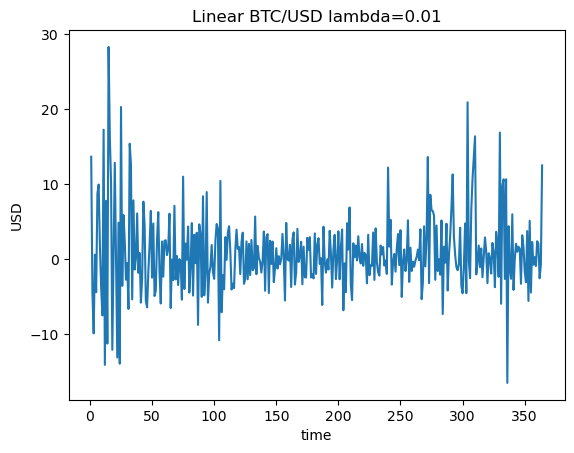

In [1182]:
total_profit=np.zeros(len(data)-1)
lam=0.01

for i in range(len(data)-1):
    fnew=data['BTC/USD:USD (Linear)'][i+1]
    fold=data['BTC/USD:USD (Linear)'][i]
    xnew=data['BTC/USD (Exchange rate)'][i+1]
    xold=data['BTC/USD (Exchange rate)'][i]
    if xold<fold:
        # Perpetual rate is overvalued, I sell the perpetual future contract and buy 
        # the exact amount of cryptocurrency on the spot exchange
        total_profit[i]=-(fnew-fold-lam*(fnew-xnew))+xnew-xold
    if xold>fold:
        # Perpetual rate is undervalued, I buy the perpetual future contract and sell
        # the exact amount of cryptocurrency on the spot exchange
        total_profit[i]=(fnew-fold-lam*(fnew-xnew))-(xnew-xold)
        
print("Total profit:", total_profit.sum(), "USD")

plt.plot(np.arange(1,len(total_profit)+1),total_profit)
plt.title('Linear BTC/USD lambda=0.01')
plt.xlabel('time')
plt.ylabel('USD')
plt.show()


Total profit: 3642.3209000000106 USD


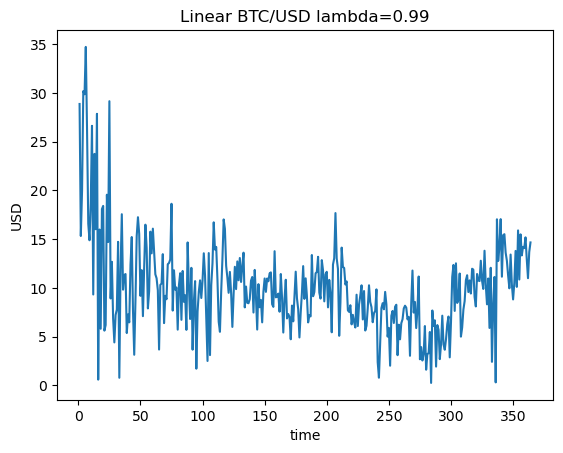

In [1183]:
total_profit=np.zeros(len(data)-1)
lam=0.99

for i in range(len(data)-1):
    fnew=data['BTC/USD:USD (Linear)'][i+1]
    fold=data['BTC/USD:USD (Linear)'][i]
    xnew=data['BTC/USD (Exchange rate)'][i+1]
    xold=data['BTC/USD (Exchange rate)'][i]
    if xold<fold:
        # Perpetual rate is overvalued, I sell the perpetual future contract and buy 
        # the exact amount of cryptocurrency on the spot exchange
        total_profit[i]=-(fnew-fold-lam*(fnew-xnew))+xnew-xold
    if xold>fold:
        # Perpetual rate is undervalued, I buy the perpetual future contract and sell
        # the exact amount of cryptocurrency on the spot exchange
        total_profit[i]=(fnew-fold-lam*(fnew-xnew))-(xnew-xold)
        
print("Total profit:", total_profit.sum(), "USD")

plt.plot(np.arange(1,len(total_profit)+1),total_profit)
plt.title('Linear BTC/USD lambda=0.99')
plt.xlabel('time')
plt.ylabel('USD')
plt.show()

Total profit: 9.202940319604358e-07 BTC


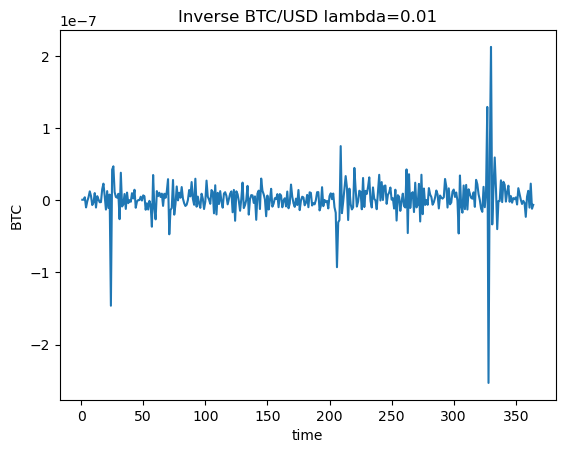

In [1184]:
total_profit=np.zeros(len(data)-1)
lam=0.01

for i in range(len(data)-1):
    inew=data['BTC/USD:BTC (Inverse)'][i+1]
    iold=data['BTC/USD:BTC (Inverse)'][i]
    xnew=data['BTC/USD (Exchange rate)'][i+1]
    xold=data['BTC/USD (Exchange rate)'][i]
    if xold<iold:
        # Perpetual rate is overvalued, for the inverse future I buy the perpetual future contract
        # and sell the same amount of non cryptocurrency on the spot exchange
        total_profit[i]=(1/inew-1/iold-lam*(1/inew-1/xnew))-(1/xnew-1/xold)
    if xold>iold:
        # Perpetual rate is undervalued, I sell the perpetual future contract
        # and buy the same amount of non cryptocurrency on the spot exchange
        total_profit[i]=-(1/inew-1/iold-lam*(1/inew-1/xnew))+(1/xnew-1/xold)
        
print("Total profit:", total_profit.sum(), "BTC")

plt.plot(np.arange(1,len(total_profit)+1),total_profit)
plt.title('Inverse BTC/USD lambda=0.01')
plt.xlabel('time')
plt.ylabel('BTC')
plt.show()

Total profit: 1.2268128126824985e-05 BTC


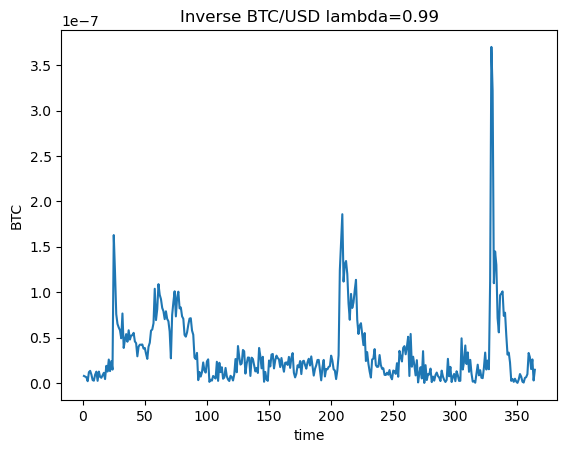

In [1185]:
total_profit=np.zeros(len(data)-1)
lam=0.99

for i in range(len(data)-1):
    inew=data['BTC/USD:BTC (Inverse)'][i+1]
    iold=data['BTC/USD:BTC (Inverse)'][i]
    xnew=data['BTC/USD (Exchange rate)'][i+1]
    xold=data['BTC/USD (Exchange rate)'][i]
    if xold<iold:
        # Perpetual rate is overvalued, for the inverse future I buy the perpetual future contract
        # and sell the same amount of non cryptocurrency on the spot exchange
        total_profit[i]=(1/inew-1/iold-lam*(1/inew-1/xnew))-(1/xnew-1/xold)
    if xold>iold:
        # Perpetual rate is undervalued, I sell the perpetual future contract
        # and buy the same amount of non cryptocurrency on the spot exchange
        total_profit[i]=-(1/inew-1/iold-lam*(1/inew-1/xnew))+(1/xnew-1/xold)
        
print("Total profit:", total_profit.sum(), "BTC")

plt.plot(np.arange(1,len(total_profit)+1),total_profit)
plt.title('Inverse BTC/USD lambda=0.99')
plt.xlabel('time')
plt.ylabel('BTC')
plt.show()

In [1186]:
model_ETH_lin=sm.OLS(data['ETH/USD (Exchange rate)'],data[['const','ETH/USD:USD (Linear)']]).fit()
model_ETH_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     ETH/USD (Exchange rate)   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 2.759e+08
Date:                     Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                             18:54:15   Log-Likelihood:                -248.34
No. Observations:                      365   AIC:                             500.7
Df Residuals:                          363   BIC:                             508.5
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0674      0.099     -0.678      0.498      -0.263       0.128
ETH/USD:USD (Linear)     1.0005   6.02e-05   1.66e+04      0.000       1.000       1.001
==============================================================================
Omnibus:                       68.362   Durbin-Watson:                   0.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.039
Skew:                          -0.705   Prob(JB):                     4.74e-68
Kurtosis:                       7.290   Cond. No.                     6.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1187]:
model_ETH_lin.f_test((A,t))

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=371.53804681405677, p=1.4999400614318888e-88, df_denom=363, df_num=2>

In [1188]:
u_statistic_ETH_lin,p_value_ETH_lin = stats.ttest_rel(data['ETH/USD (Exchange rate)'], data['ETH/USD:USD (Linear)'], alternative='two-sided')
print(p_value_ETH_lin)

1.382449810567807e-78


In [1189]:
model_ETH_inv=sm.OLS(data['ETH/USD (Exchange rate)'],data[['const','ETH/USD:ETH (Inverse)']]).fit()
model_ETH_inv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     ETH/USD (Exchange rate)   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 2.338e+07
Date:                     Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                             18:54:15   Log-Likelihood:                -698.76
No. Observations:                      365   AIC:                             1402.
Df Residuals:                          363   BIC:                             1409.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.7383      0.341      2.164      0.031       0.067       1.409
ETH/USD:ETH (Inverse)     1.0000      0.000   4835.359      0.000       1.000       1.000
==============================================================================
Omnibus:                      188.841   Durbin-Watson:                   0.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2735.666
Skew:                          -1.803   Prob(JB):                         0.00
Kurtosis:                      15.918   Cond. No.                     6.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1190]:
model_ETH_inv.f_test((A,t))

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=33.91825060014082, p=3.128494856926029e-14, df_denom=363, df_num=2>

In [1191]:
u_statistic_ETH_inv,p_value_ETH_inv = stats.ttest_rel(data['ETH/USD (Exchange rate)'], data['ETH/USD:ETH (Inverse)'], alternative='two-sided')
print(p_value_ETH_inv)

2.9936019896532542e-15


Total profit: 16.977499999998717 USD


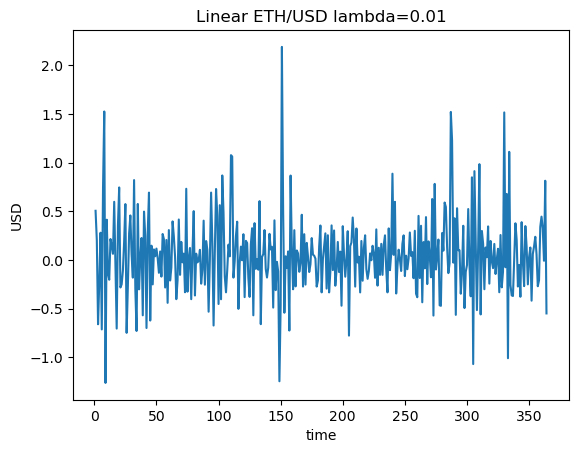

In [1192]:
total_profit=np.zeros(len(data)-1)
lam=0.01

for i in range(len(data)-1):
    fnew=data['ETH/USD:USD (Linear)'][i+1]
    fold=data['ETH/USD:USD (Linear)'][i]
    xnew=data['ETH/USD (Exchange rate)'][i+1]
    xold=data['ETH/USD (Exchange rate)'][i]
    if xold<fold:
        # Perpetual rate is overvalued, I sell the perpetual future contract and buy 
        # the exact amount of cryptocurrency on the spot exchange
        total_profit[i]=-(fnew-fold-lam*(fnew-xnew))+xnew-xold
    if xold>fold:
        # Perpetual rate is undervalued, I buy the perpetual future contract and sell
        # the exact amount of cryptocurrency on the spot exchange
        total_profit[i]=(fnew-fold-lam*(fnew-xnew))-(xnew-xold)
        
print("Total profit:", total_profit.sum(), "USD")

plt.plot(np.arange(1,len(total_profit)+1),total_profit)
plt.title('Linear ETH/USD lambda=0.01')
plt.xlabel('time')
plt.ylabel('USD')
plt.show()

Total profit: 262.7124999999952 USD


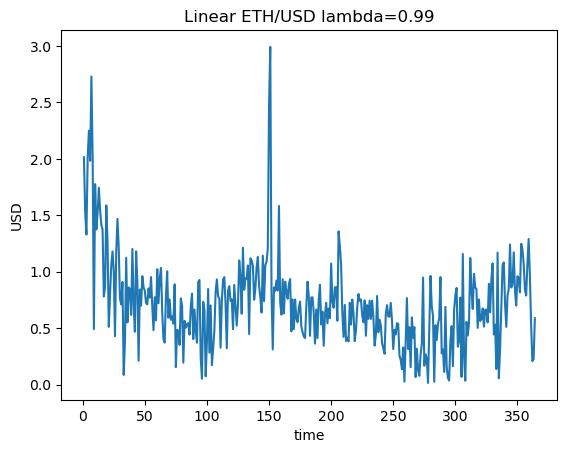

In [1193]:
total_profit=np.zeros(len(data)-1)
lam=0.99

for i in range(len(data)-1):
    fnew=data['ETH/USD:USD (Linear)'][i+1]
    fold=data['ETH/USD:USD (Linear)'][i]
    xnew=data['ETH/USD (Exchange rate)'][i+1]
    xold=data['ETH/USD (Exchange rate)'][i]
    if xold<fold:
        # Perpetual rate is overvalued, I sell the perpetual future contract and buy 
        # the exact amount of cryptocurrency on the spot exchange
        total_profit[i]=-(fnew-fold-lam*(fnew-xnew))+xnew-xold
    if xold>fold:
        # Perpetual rate is undervalued, I buy the perpetual future contract and sell
        # the exact amount of cryptocurrency on the spot exchange
        total_profit[i]=(fnew-fold-lam*(fnew-xnew))-(xnew-xold)
        
print("Total profit:", total_profit.sum(), "USD")

plt.plot(np.arange(1,len(total_profit)+1),total_profit)
plt.title('Linear ETH/USD lambda=0.99')
plt.xlabel('time')
plt.ylabel('USD')
plt.show()

Total profit: 1.381096814381035e-05 ETH


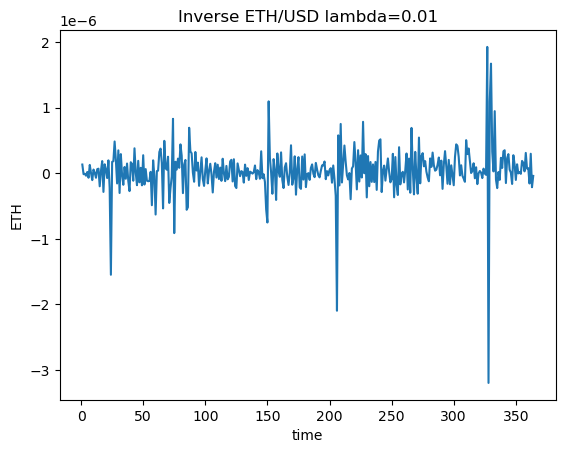

In [1194]:
total_profit=np.zeros(len(data)-1)
lam=0.01

for i in range(len(data)-1):
    inew=data['ETH/USD:ETH (Inverse)'][i+1]
    iold=data['ETH/USD:ETH (Inverse)'][i]
    xnew=data['ETH/USD (Exchange rate)'][i+1]
    xold=data['ETH/USD (Exchange rate)'][i]
    if xold<iold:
        # Perpetual rate is overvalued, for the inverse future I buy the perpetual future contract
        # and sell the same amount of non cryptocurrency on the spot exchange
        total_profit[i]=(1/inew-1/iold-lam*(1/inew-1/xnew))-(1/xnew-1/xold)
    if xold>iold:
        # Perpetual rate is undervalued, I sell the perpetual future contract
        # and buy the same amount of non cryptocurrency on the spot exchange
        total_profit[i]=-(1/inew-1/iold-lam*(1/inew-1/xnew))+(1/xnew-1/xold)
        
print("Total profit:", total_profit.sum(), "ETH")

plt.plot(np.arange(1,len(total_profit)+1),total_profit)
plt.title('Inverse ETH/USD lambda=0.01')
plt.xlabel('time')
plt.ylabel('ETH')
plt.show()

Total profit: 0.0001945644814988763 ETH


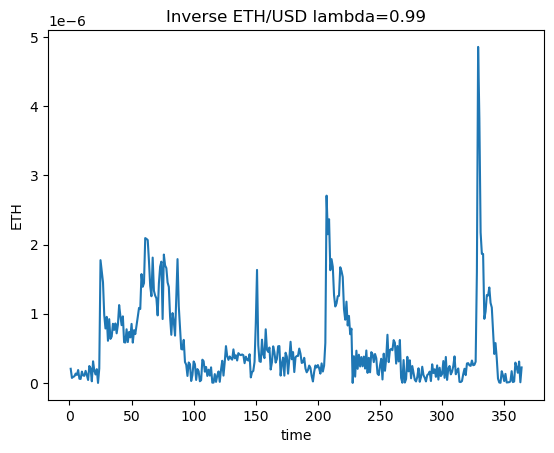

In [1195]:
total_profit=np.zeros(len(data)-1)
lam=0.99

for i in range(len(data)-1):
    inew=data['ETH/USD:ETH (Inverse)'][i+1]
    iold=data['ETH/USD:ETH (Inverse)'][i]
    xnew=data['ETH/USD (Exchange rate)'][i+1]
    xold=data['ETH/USD (Exchange rate)'][i]
    if xold<iold:
        # Perpetual rate is overvalued, for the inverse future I buy the perpetual future contract
        # and sell the same amount of non cryptocurrency on the spot exchange
        total_profit[i]=(1/inew-1/iold-lam*(1/inew-1/xnew))-(1/xnew-1/xold)
    if xold>iold:
        # Perpetual rate is undervalued, I sell the perpetual future contract
        # and buy the same amount of non cryptocurrency on the spot exchange
        total_profit[i]=-(1/inew-1/iold-lam*(1/inew-1/xnew))+(1/xnew-1/xold)
        
print("Total profit:", total_profit.sum(), "ETH")

plt.plot(np.arange(1,len(total_profit)+1),total_profit)
plt.title('Inverse ETH/USD lambda=0.99')
plt.xlabel('time')
plt.ylabel('ETH')
plt.show()